- **Nama:** [Dhimas Sena Rahmantara]
- **Email:** [dhimassr@gmail.com]

In [2]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'football.ipynb',
 'goalscorers.csv',
 'player.ipynb',
 'results.csv',
 'shootouts.csv']

In [4]:
player_df = pd.read_csv('goalscorers.csv')
player_df

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False
...,...,...,...,...,...,...,...,...
44357,2024-07-13,Canada,Uruguay,Uruguay,Luis Suárez,90.0,False,False
44358,2024-07-14,Argentina,Colombia,Argentina,Lautaro Martínez,112.0,False,False
44359,2024-07-14,Spain,England,Spain,Nico Williams,47.0,False,False
44360,2024-07-14,Spain,England,England,Cole Palmer,73.0,False,False


In [7]:
player_df.isnull().sum()

date           0
home_team      0
away_team      0
team           0
scorer        49
minute       259
own_goal       0
penalty        0
dtype: int64

In [9]:
player_df.duplicated().sum()

82

In [43]:
player_df.shape

(44362, 8)

In [48]:
player_df.describe().T

,count,mean,std,min,25%,50%,75%,max
minute,44103.0,50.012698,26.358013,1.0,28.0,51.0,73.0,122.0


In [11]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44362 entries, 0 to 44361
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44362 non-null  object 
 1   home_team  44362 non-null  object 
 2   away_team  44362 non-null  object 
 3   team       44362 non-null  object 
 4   scorer     44313 non-null  object 
 5   minute     44103 non-null  float64
 6   own_goal   44362 non-null  bool   
 7   penalty    44362 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.1+ MB


In [60]:
np.unique(player_df['minute'])

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 122.,
        nan])

In [13]:
player_df[player_df['minute'].isnull()]

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
3347,1960-10-16,Taiwan,Vietnam Republic,Taiwan,Yiu Cheuk Yin,NaN,False,False
4059,1963-11-26,Ghana,Ethiopia,Ghana,Edward Acquah,NaN,False,False
4060,1963-11-26,Ghana,Ethiopia,Ghana,Edward Acquah,NaN,False,False
4063,1963-11-28,Ethiopia,Tunisia,Ethiopia,Mengistu Worku,NaN,False,False
4064,1963-11-28,Ethiopia,Tunisia,Ethiopia,Mengistu Worku,NaN,False,False
...,...,...,...,...,...,...,...,...
16812,1997-03-27,Saudi Arabia,Bangladesh,Saudi Arabia,Abdullah Al-Dosari,NaN,False,False
16838,1997-03-29,Taiwan,Bangladesh,Taiwan,Hsu Te Ming,NaN,False,False
16839,1997-03-29,Taiwan,Bangladesh,Bangladesh,Alfaz Ahmed,NaN,False,False
16840,1997-03-29,Taiwan,Bangladesh,Bangladesh,Imtiaz Ahmed Nakib,NaN,False,False


In [6]:
player_df['minute'] = player_df['minute'].fillna(player_df['minute'].median())

In [8]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44362 entries, 0 to 44361
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44362 non-null  object 
 1   home_team  44362 non-null  object 
 2   away_team  44362 non-null  object 
 3   team       44362 non-null  object 
 4   scorer     44313 non-null  object 
 5   minute     44362 non-null  float64
 6   own_goal   44362 non-null  bool   
 7   penalty    44362 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.1+ MB


In [10]:
(player_df[player_df['scorer'].isnull()])

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
8697,1980-02-24,Vanuatu,Papua New Guinea,Papua New Guinea,NaN,51.0,False,False
8698,1980-02-24,Vanuatu,Papua New Guinea,Papua New Guinea,NaN,51.0,False,False
8699,1980-02-24,Vanuatu,Papua New Guinea,Papua New Guinea,NaN,51.0,False,False
8700,1980-02-24,Vanuatu,Papua New Guinea,Papua New Guinea,NaN,51.0,False,False
8701,1980-02-24,Vanuatu,Papua New Guinea,Vanuatu,NaN,51.0,False,False
8702,1980-02-24,Vanuatu,Papua New Guinea,Vanuatu,NaN,51.0,False,False
8703,1980-02-24,Vanuatu,Papua New Guinea,Vanuatu,NaN,51.0,False,False
8704,1980-02-25,Fiji,Solomon Islands,Fiji,NaN,51.0,False,False
8705,1980-02-25,Fiji,Solomon Islands,Fiji,NaN,51.0,False,False
8706,1980-02-25,Fiji,Solomon Islands,Fiji,NaN,51.0,False,False


In [12]:
for i in range (0, len(player_df), 1):
    if (player_df.at[i, 'team'] == 'Fiji' and pd.isnull(player_df.at[i, 'scorer'])):
        player_df.loc[i, 'scorer'] = 'Unknown Fiji'
    elif (player_df.at[i, 'team'] == 'Tahiti' and pd.isnull(player_df.at[i, 'scorer'])):
        player_df.loc[i, 'scorer'] = 'Unknown Tahiti'
    elif (player_df.at[i, 'team'] == 'New Caledonia' and pd.isnull(player_df.at[i, 'scorer'])):
        player_df.loc[i, 'scorer'] = 'Unknown New Caledonia'
    elif (player_df.at[i, 'team'] == 'Vanuatu' and pd.isnull(player_df.at[i, 'scorer'])):
        player_df.loc[i, 'scorer'] = 'Unknown Vanuatu'
    elif (player_df.at[i, 'team'] == 'Papua New Guinea' and pd.isnull(player_df.at[i, 'scorer'])):
        player_df.loc[i, 'scorer'] = 'Unknown Papua New Guinea'
    elif (player_df.at[i, 'team'] == 'Solomon Islands' and pd.isnull(player_df.at[i, 'scorer'])):
        player_df.loc[i, 'scorer'] = 'Unknown Solomon Islands'
    elif (player_df.at[i, 'team'] == 'Qatar' and pd.isnull(player_df.at[i, 'scorer'])):
        player_df.loc[i, 'scorer'] = 'Unknown Qatar'

In [14]:
len(player_df[player_df['scorer'].isnull()])

0

In [16]:
player_df.isnull().sum()

date         0
home_team    0
away_team    0
team         0
scorer       0
minute       0
own_goal     0
penalty      0
dtype: int64

In [18]:
goal_per_team = player_df.groupby('team').count().sort_values(by='scorer',
                                                                 ascending=False).head(15).reset_index()
goal_per_team

,team,date,home_team,away_team,scorer,minute,own_goal,penalty
0,Brazil,1051,1051,1051,1051,1051,1051,1051
1,Germany,974,974,974,974,974,974,974
2,Argentina,948,948,948,948,948,948,948
3,Spain,894,894,894,894,894,894,894
4,Mexico,852,852,852,852,852,852,852
5,Netherlands,851,851,851,851,851,851,851
6,Uruguay,804,804,804,804,804,804,804
7,England,775,775,775,775,775,775,775
8,France,766,766,766,766,766,766,766
9,Italy,720,720,720,720,720,720,720


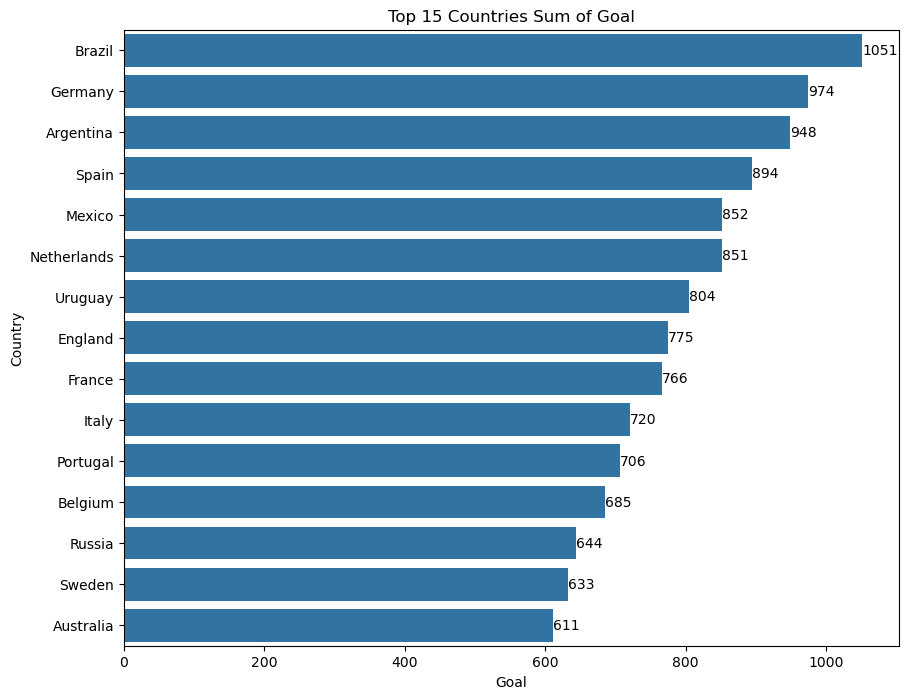

In [20]:
plt.figure(figsize=(10, 8))
g = sns.barplot(
    data=goal_per_team, x="date", y="team", orient="h"
)
g.bar_label(g.containers[0])

plt.title("Top 15 Countries Sum of Goal")
plt.xlabel("Goal")
plt.ylabel("Country")
plt.show()

In [22]:
top_30_brazil = player_df[player_df['team'] == 'Brazil'].groupby('scorer').count().sort_values(
    by='date', ascending=False).head(30)
top_30_brazil

,date,home_team,away_team,team,minute,own_goal,penalty
scorer,,,,,,,
Ronaldo,39,39,39,39,39,39,39
Romário,33,33,33,33,33,33,33
Neymar,31,31,31,31,31,31,31
Pelé,26,26,26,26,26,26,26
Ademir de Menezes,22,22,22,22,22,22,22
Rivaldo,21,21,21,21,21,21,21
Luís Fabiano,20,20,20,20,20,20,20
Bebeto,19,19,19,19,19,19,19
Zico,18,18,18,18,18,18,18


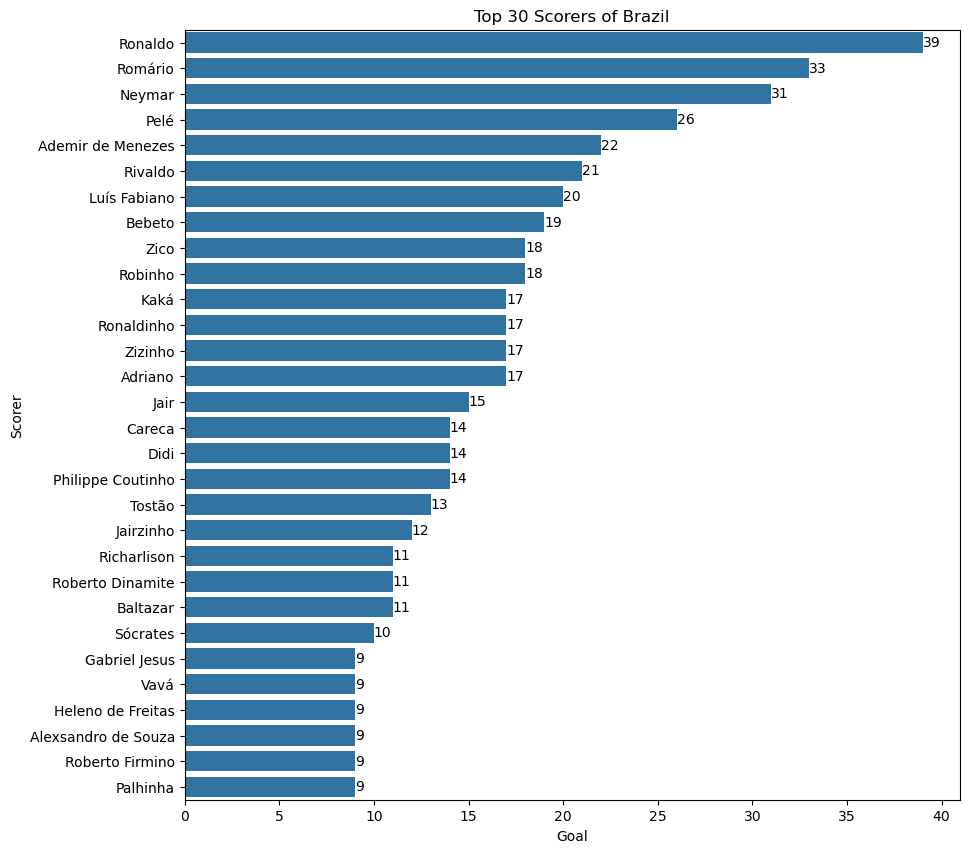

In [24]:
plt.figure(figsize=(10, 10))
g = sns.barplot(
    data=top_30_brazil, x="own_goal", y="scorer", orient="h"
)
g.bar_label(g.containers[0])

plt.title("Top 30 Scorers of Brazil")
plt.xlabel("Goal")
plt.ylabel("Scorer")
plt.show()

In [26]:
top_30_germany = player_df[player_df['team'] == 'Germany'].groupby('scorer').count().sort_values(by='date',
                                                                               ascending=False).head(30)
top_30_germany

,date,home_team,away_team,team,minute,own_goal,penalty
scorer,,,,,,,
Miroslav Klose,48,48,48,48,48,48,48
Gerd Müller,39,39,39,39,39,39,39
Thomas Müller,35,35,35,35,35,35,35
Karl-Heinz Rummenigge,32,32,32,32,32,32,32
Jürgen Klinsmann,30,30,30,30,30,30,30
Lukas Podolski,29,29,29,29,29,29,29
Michael Ballack,27,27,27,27,27,27,27
Rudi Völler,26,26,26,26,26,26,26
Timo Werner,20,20,20,20,20,20,20


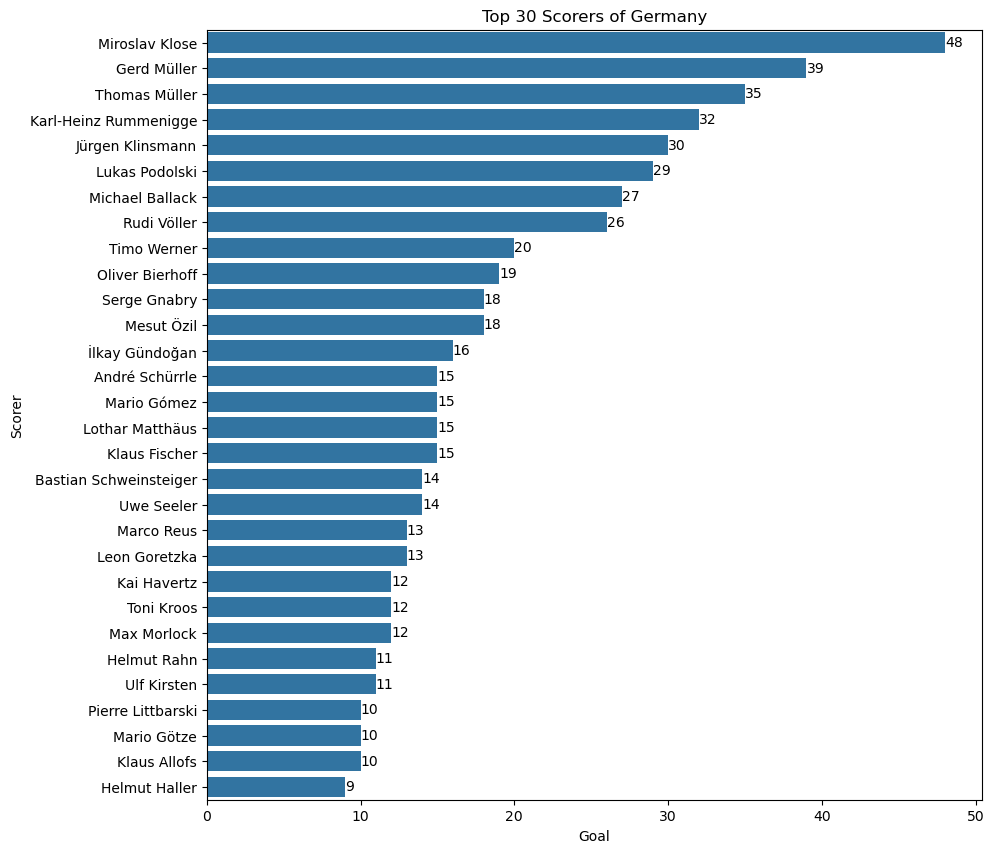

In [28]:
plt.figure(figsize=(10, 10))
g = sns.barplot(
    data=top_30_germany, x="own_goal", y="scorer", orient="h"
)
g.bar_label(g.containers[0])

plt.title("Top 30 Scorers of Germany")
plt.xlabel("Goal")
plt.ylabel("Scorer")
plt.show()

In [30]:
top_30_argentina = player_df[player_df['team'] == 'Argentina'].groupby('scorer').count().sort_values(by='date',
                                                                               ascending=False).head(30)
top_30_argentina

,date,home_team,away_team,team,minute,own_goal,penalty
scorer,,,,,,,
Lionel Messi,55,55,55,55,55,55,55
Gabriel Batistuta,37,37,37,37,37,37,37
Hernán Crespo,26,26,26,26,26,26,26
Gonzalo Higuaín,23,23,23,23,23,23,23
Sergio Agüero,20,20,20,20,20,20,20
Lautaro Martínez,18,18,18,18,18,18,18
Norberto Doroteo Méndez,17,17,17,17,17,17,17
Ángel Di María,17,17,17,17,17,17,17
Juan Román Riquelme,15,15,15,15,15,15,15


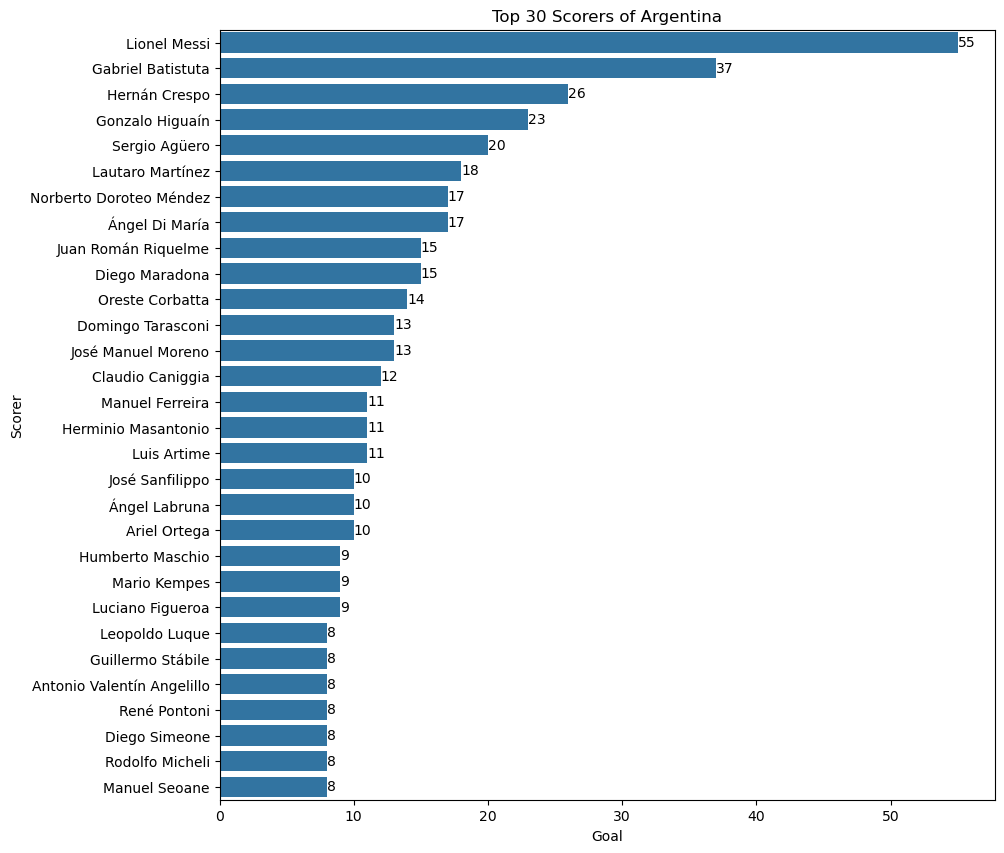

In [32]:
plt.figure(figsize=(10, 10))
g = sns.barplot(
    data=top_30_argentina, x="own_goal", y="scorer", orient="h"
)
g.bar_label(g.containers[0])

plt.title("Top 30 Scorers of Argentina")
plt.xlabel("Goal")
plt.ylabel("Scorer")
plt.show()

In [34]:
player_df.value_counts('scorer').head(20)

scorer
Cristiano Ronaldo      108
Robert Lewandowski      63
Romelu Lukaku           60
Harry Kane              58
Lionel Messi            55
Edin Džeko              50
Ali Daei                49
Miroslav Klose          48
Carlos Ruiz             47
Aleksandar Mitrović     47
Luis Suárez             47
Robbie Keane            44
Zlatan Ibrahimović      44
Clint Dempsey           41
David Villa             41
Samuel Eto'o            40
Andriy Shevchenko       40
Ronaldo                 39
Gerd Müller             39
Hakan Şükür             39
Name: count, dtype: int64

In [36]:
top_20_scorer = player_df.groupby(by=['scorer', 'team']).count().sort_values(
    by='date',ascending=False).head(20).reset_index()

top_20_scorer['scorer_team'] = top_20_scorer['scorer'] + ' - ' + top_20_scorer['team']
top_20_scorer

,scorer,team,date,home_team,away_team,minute,own_goal,penalty,scorer_team
0,Cristiano Ronaldo,Portugal,108,108,108,108,108,108,Cristiano Ronaldo - Portugal
1,Robert Lewandowski,Poland,63,63,63,63,63,63,Robert Lewandowski - Poland
2,Romelu Lukaku,Belgium,60,60,60,60,60,60,Romelu Lukaku - Belgium
3,Harry Kane,England,58,58,58,58,58,58,Harry Kane - England
4,Lionel Messi,Argentina,55,55,55,55,55,55,Lionel Messi - Argentina
5,Edin Džeko,Bosnia and Herzegovina,50,50,50,50,50,50,Edin Džeko - Bosnia and Herzegovina
6,Ali Daei,Iran,49,49,49,49,49,49,Ali Daei - Iran
7,Miroslav Klose,Germany,48,48,48,48,48,48,Miroslav Klose - Germany
8,Aleksandar Mitrović,Serbia,47,47,47,47,47,47,Aleksandar Mitrović - Serbia
9,Carlos Ruiz,Guatemala,47,47,47,47,47,47,Carlos Ruiz - Guatemala


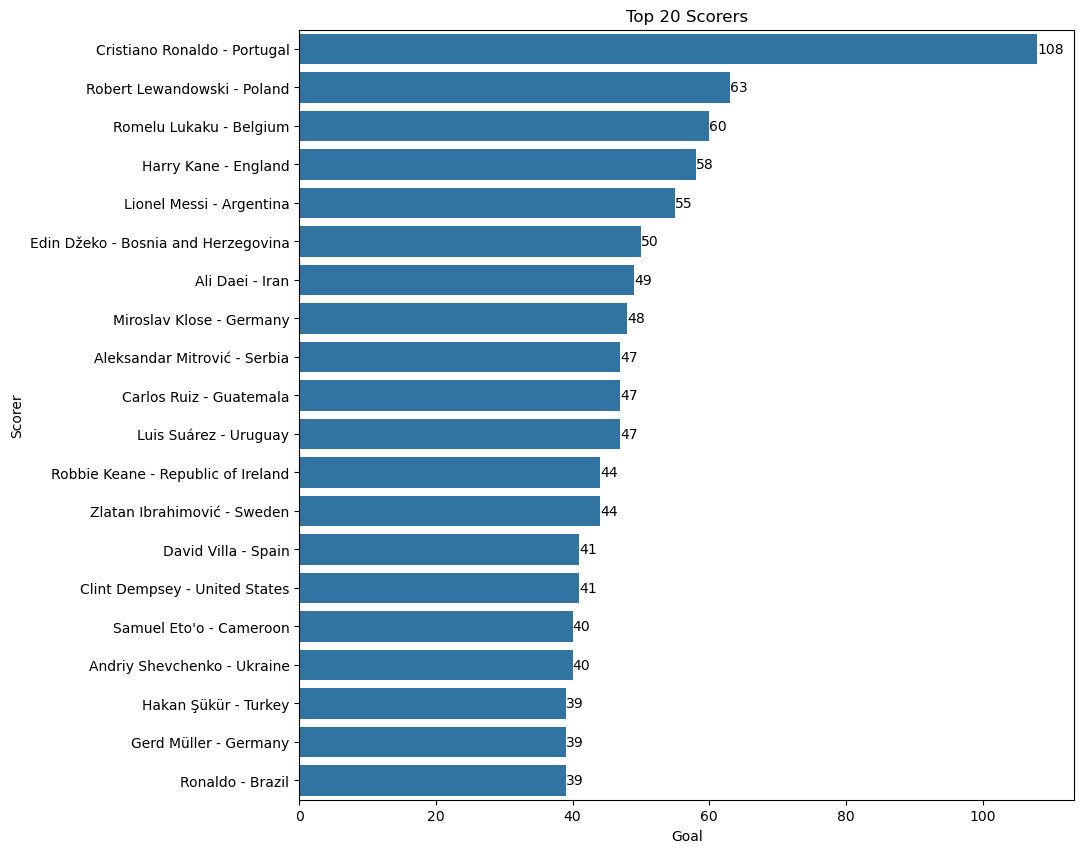

In [38]:
plt.figure(figsize=(10, 10))
g = sns.barplot(
    data=top_20_scorer, x="own_goal", y='scorer_team', orient="h"
)
g.bar_label(g.containers[0])

plt.title("Top 20 Scorers")
plt.xlabel("Goal")
plt.ylabel("Scorer")
plt.show()

In [40]:
pele_df = player_df[player_df['scorer'] == 'Pelé']
pele_home_df = pele_df[pele_df['home_team'] == 'Brazil']
pele_away_df = pele_df[pele_df['away_team'] == 'Brazil']

In [42]:
pele_home_goal = pele_home_df.groupby('away_team').count().sort_values(by='own_goal',
                                                                       ascending=False).reset_index()
pele_away_goal = pele_away_df.groupby('home_team').count().sort_values(by='own_goal',
                                                                       ascending=False).reset_index()


In [44]:
pele_home_goal['team'] = pele_home_goal['away_team']
pele_home_goal = pele_home_goal.drop('away_team', axis=1)
pele_home_goal = pele_home_goal.drop('home_team', axis=1)

In [46]:
pele_home_goal

,date,team,scorer,minute,own_goal,penalty
0,4,Paraguay,4,4,4,4
1,3,France,3,3,3,3
2,2,Chile,2,2,2,2
3,2,Romania,2,2,2,2
4,2,Venezuela,2,2,2,2
5,1,Bulgaria,1,1,1,1
6,1,Colombia,1,1,1,1
7,1,Czechoslovakia,1,1,1,1
8,1,Italy,1,1,1,1
9,1,Mexico,1,1,1,1


In [48]:
pele_away_goal['team'] = pele_away_goal['home_team']
pele_away_goal = pele_away_goal.drop('away_team', axis=1)
pele_away_goal = pele_away_goal.drop('home_team', axis=1)

In [50]:
pele_away_goal

,date,team,scorer,minute,own_goal,penalty
0,2,Sweden,2,2,2,2
1,2,Venezuela,2,2,2,2
2,1,Argentina,1,1,1,1
3,1,Bolivia,1,1,1,1


In [52]:
pele_goal = pd.concat([pele_home_goal, pele_away_goal]).sort_values(by='own_goal',
                                                                       ascending=False).reset_index()
pele_goal

,index,date,team,scorer,minute,own_goal,penalty
0,0,4,Paraguay,4,4,4,4
1,1,3,France,3,3,3,3
2,2,2,Chile,2,2,2,2
3,3,2,Romania,2,2,2,2
4,4,2,Venezuela,2,2,2,2
5,0,2,Sweden,2,2,2,2
6,1,2,Venezuela,2,2,2,2
7,5,1,Bulgaria,1,1,1,1
8,6,1,Colombia,1,1,1,1
9,7,1,Czechoslovakia,1,1,1,1


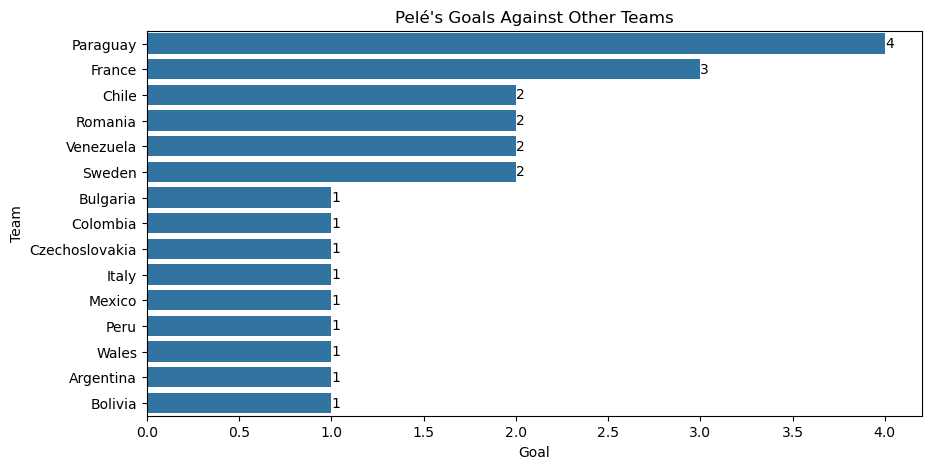

26

In [54]:
plt.figure(figsize=(10, 5))
g = sns.barplot(
    data=pele_goal, x="own_goal", y='team', orient="h"
)
g.bar_label(g.containers[0])

plt.title("Pelé's Goals Against Other Teams")
plt.xlabel("Goal")
plt.ylabel("Team")
plt.show()
len(pele_df)

In [56]:
maradona_df = player_df[player_df['scorer'] == 'Diego Maradona']
maradona_home_df = maradona_df[maradona_df['home_team'] == 'Argentina']
maradona_away_df = maradona_df[maradona_df['away_team'] == 'Argentina']

In [58]:
maradona_home_goal = maradona_home_df.groupby('away_team').count().sort_values(by='own_goal',
                                                                       ascending=False).reset_index()
maradona_away_goal = maradona_away_df.groupby('home_team').count().sort_values(by='own_goal',
                                                                       ascending=False).reset_index()


In [60]:
maradona_home_goal['team'] = maradona_home_goal['away_team']
maradona_home_goal = maradona_home_goal.drop('away_team', axis=1)
maradona_home_goal = maradona_home_goal.drop('home_team', axis=1)

In [62]:
maradona_home_goal

,date,team,scorer,minute,own_goal,penalty
0,2,Belgium,2,2,2,2
1,2,Ecuador,2,2,2,2
2,2,England,2,2,2,2
3,2,Hungary,2,2,2,2
4,1,Bolivia,1,1,1,1
5,1,Greece,1,1,1,1
6,1,Peru,1,1,1,1
7,1,Venezuela,1,1,1,1


In [64]:
maradona_away_goal['team'] = maradona_away_goal['home_team']
maradona_away_goal = maradona_away_goal.drop('away_team', axis=1)
maradona_away_goal = maradona_away_goal.drop('home_team', axis=1)

In [66]:
maradona_away_goal

,date,team,scorer,minute,own_goal,penalty
0,2,Venezuela,2,2,2,2
1,1,Italy,1,1,1,1


In [70]:
maradona_goal = pd.concat([maradona_home_goal, maradona_away_goal]).sort_values(by='own_goal',
                                                                               ascending=False).reset_index()
# maradona_goal
maradona_dup = maradona_goal[maradona_goal.duplicated('team', keep=False)]
maradona_dup = pd.DataFrame(maradona_dup.sum()).T
maradona_dup['team'] = 'Venezuela'
maradona_goal = pd.concat([maradona_goal, maradona_dup]).sort_values(by='own_goal',
                                                                               ascending=False).reset_index()
maradona_goal

,level_0,index,date,team,scorer,minute,own_goal,penalty
0,0,7,3,Venezuela,3,3,3,3
1,0,0,2,Belgium,2,2,2,2
2,1,1,2,Ecuador,2,2,2,2
3,2,2,2,England,2,2,2,2
4,3,3,2,Hungary,2,2,2,2
5,4,0,2,Venezuela,2,2,2,2
6,5,4,1,Bolivia,1,1,1,1
7,6,5,1,Greece,1,1,1,1
8,7,6,1,Peru,1,1,1,1
9,8,7,1,Venezuela,1,1,1,1


In [72]:
maradona_goal = maradona_goal.drop(maradona_goal[(maradona_goal.index > 0) & 
                                   (maradona_goal['team'] == 'Venezuela')].index)
maradona_goal = maradona_goal.drop('level_0', axis=1)
maradona_goal = maradona_goal.drop('index', axis=1)

In [74]:
maradona_goal

,date,team,scorer,minute,own_goal,penalty
0,3,Venezuela,3,3,3,3
1,2,Belgium,2,2,2,2
2,2,Ecuador,2,2,2,2
3,2,England,2,2,2,2
4,2,Hungary,2,2,2,2
6,1,Bolivia,1,1,1,1
7,1,Greece,1,1,1,1
8,1,Peru,1,1,1,1
10,1,Italy,1,1,1,1


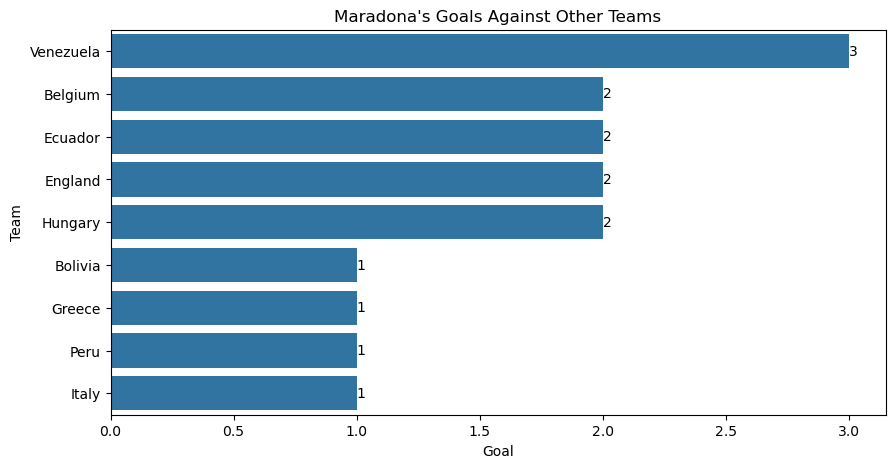

15

In [76]:
plt.figure(figsize=(10, 5))
g = sns.barplot(
    data=maradona_goal, x="own_goal", y='team', orient="h"
)
g.bar_label(g.containers[0])

plt.title("Maradona's Goals Against Other Teams")
plt.xlabel("Goal")
plt.ylabel("Team")
plt.show()
len(maradona_df)

In [78]:
cr_df = player_df[player_df['scorer'] == 'Cristiano Ronaldo']
cr_home_df = cr_df[cr_df['home_team'] == 'Portugal']
cr_away_df = cr_df[cr_df['away_team'] == 'Portugal']

In [80]:
cr_home_goal = cr_home_df.groupby('away_team').count().sort_values(by='own_goal',
                                                                       ascending=False).reset_index()
cr_away_goal = cr_away_df.groupby('home_team').count().sort_values(by='own_goal',
                                                                       ascending=False).reset_index()

In [82]:
cr_home_goal['team'] = cr_home_goal['away_team']
cr_home_goal = cr_home_goal.drop('away_team', axis=1)
cr_home_goal = cr_home_goal.drop('home_team', axis=1)


In [84]:
cr_home_goal

,date,team,scorer,minute,own_goal,penalty
0,5,Switzerland,5,5,5,5
1,4,Andorra,4,4,4,4
2,4,Luxembourg,4,4,4,4
3,3,Spain,3,3,3,3
4,3,Slovakia,3,3,3,3
5,3,Faroe Islands,3,3,3,3
6,3,Netherlands,3,3,3,3
7,3,Lithuania,3,3,3,3
8,2,Liechtenstein,2,2,2,2
9,2,Russia,2,2,2,2


In [86]:
cr_away_goal['team'] = cr_away_goal['home_team']
cr_away_goal = cr_away_goal.drop('away_team', axis=1)
cr_away_goal = cr_away_goal.drop('home_team', axis=1)


In [88]:
cr_away_goal

,date,team,scorer,minute,own_goal,penalty
0,6,Luxembourg,6,6,6,6
1,5,Sweden,5,5,5,5
2,4,Hungary,4,4,4,4
3,4,Armenia,4,4,4,4
4,4,Lithuania,4,4,4,4
5,3,Latvia,3,3,3,3
6,3,Northern Ireland,3,3,3,3
7,2,Bosnia and Herzegovina,2,2,2,2
8,2,Cyprus,2,2,2,2
9,2,Czech Republic,2,2,2,2


In [90]:
cr_goal = pd.concat([cr_home_goal, cr_away_goal]).sort_values(by='own_goal',
                                                                               ascending=False).reset_index()
cr_goal = cr_goal.drop(['index','date','scorer','minute','penalty'], axis=1)
cr_goal

,team,own_goal
0,Luxembourg,6
1,Switzerland,5
2,Sweden,5
3,Lithuania,4
4,Hungary,4
5,Armenia,4
6,Andorra,4
7,Luxembourg,4
8,Lithuania,3
9,Northern Ireland,3


In [92]:
cr_dup = cr_goal[cr_goal.duplicated('team', keep=False)]
cr_dup_team = cr_dup['team'].unique()

team = []
own_goal = []
for i in range(0, len(cr_dup_team), 1):
    team.append(cr_dup_team[i])
    #cari baris single value team berdasarkan kolom team,
    # lalu ambil single value di kolom own_goal di baris itu juga, lalu sum
    sum_goal = cr_dup.loc[cr_dup['team'] == cr_dup_team[i], 'own_goal'].sum()
    own_goal.append(sum_goal)

for i in range(0, len(cr_dup_team), 1):
    cr_goal = cr_goal.drop(cr_goal[(cr_goal['team'] == cr_dup_team[i])].index)

cr_dup_df = pd.DataFrame(
    {'team': team,
     'own_goal': own_goal
    })

print(cr_dup_df)
print(cr_goal)

                      team  own_goal
0               Luxembourg        10
1                   Sweden         6
2                Lithuania         7
3                  Hungary         6
4                  Armenia         5
5                  Andorra         5
6                   Latvia         5
7            Faroe Islands         4
8                  Denmark         3
9   Bosnia and Herzegovina         4
10           Liechtenstein         3
11                  Russia         3
12                 Estonia         2
13              Kazakhstan         2
                   team  own_goal
1           Switzerland         5
9      Northern Ireland         3
11          Netherlands         3
13             Slovakia         3
14                Spain         3
15               Cyprus         2
17              Iceland         2
19       Czech Republic         2
20               France         2
21              Belgium         2
24  Republic of Ireland         2
26           Azerbaijan         2
29 

In [94]:
cr_goal = pd.concat([cr_dup_df, cr_goal]).sort_values(by='own_goal',
                                                     ascending=False).reset_index()
cr_goal

,index,team,own_goal
0,0,Luxembourg,10
1,2,Lithuania,7
2,3,Hungary,6
3,1,Sweden,6
4,1,Switzerland,5
5,4,Armenia,5
6,5,Andorra,5
7,6,Latvia,5
8,7,Faroe Islands,4
9,9,Bosnia and Herzegovina,4


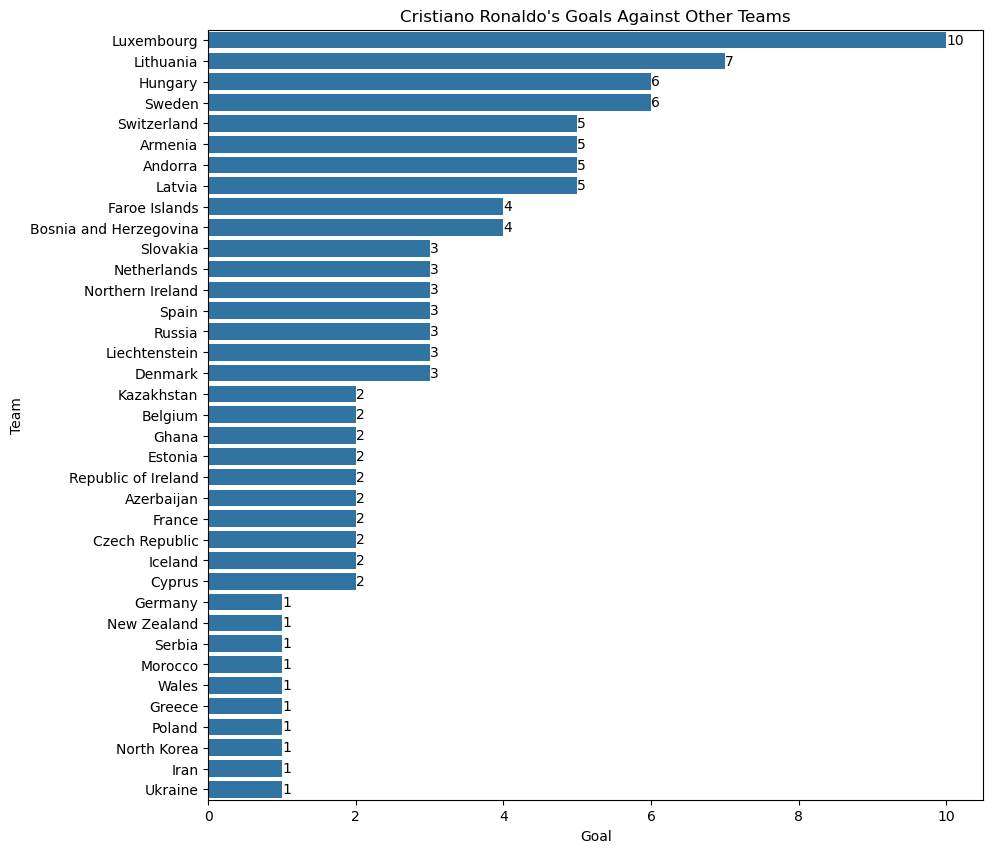

In [96]:
plt.figure(figsize=(10, 10))
g = sns.barplot(
    data=cr_goal, x="own_goal", y='team', orient="h"
)
g.bar_label(g.containers[0])

plt.title("Cristiano Ronaldo's Goals Against Other Teams")
plt.xlabel("Goal")
plt.ylabel("Team")
plt.show()

In [98]:
lm_df = player_df[player_df['scorer'] == 'Lionel Messi']
lm_home_df = lm_df[lm_df['home_team'] == 'Argentina']
lm_away_df = lm_df[lm_df['away_team'] == 'Argentina']

In [100]:
lm_home_goal = lm_home_df.groupby('away_team').count().sort_values(by='own_goal',
                                                                       ascending=False).reset_index()
lm_away_goal = lm_away_df.groupby('home_team').count().sort_values(by='own_goal',
                                                                       ascending=False).reset_index()

In [102]:
lm_home_goal['team'] = lm_home_goal['away_team']
lm_home_goal = lm_home_goal.drop('away_team', axis=1)
lm_home_goal = lm_home_goal.drop('home_team', axis=1)


In [104]:
lm_home_goal

,date,team,scorer,minute,own_goal,penalty
0,6,Bolivia,6,6,6,6
1,5,Uruguay,5,5,5,5
2,4,Venezuela,4,4,4,4
3,4,Chile,4,4,4,4
4,3,Panama,3,3,3,3
5,3,Ecuador,3,3,3,3
6,3,Paraguay,3,3,3,3
7,2,France,2,2,2,2
8,1,Serbia,1,1,1,1
9,1,Saudi Arabia,1,1,1,1


In [106]:
lm_away_goal['team'] = lm_away_goal['home_team']
lm_away_goal = lm_away_goal.drop('away_team', axis=1)
lm_away_goal = lm_away_goal.drop('home_team', axis=1)


In [108]:
lm_away_goal

,date,team,scorer,minute,own_goal,penalty
0,3,Ecuador,3,3,3,3
1,3,Nigeria,3,3,3,3
2,2,Colombia,2,2,2,2
3,2,Paraguay,2,2,2,2
4,1,Chile,1,1,1,1
5,1,Mexico,1,1,1,1
6,1,Netherlands,1,1,1,1
7,1,United States,1,1,1,1
8,1,Venezuela,1,1,1,1


In [120]:
lm_goal = pd.concat([lm_home_goal, lm_away_goal]).sort_values(by='own_goal', ascending=False).reset_index()
lm_goal = lm_goal.drop(['index','date','scorer','minute','penalty'], axis=1)
lm_goal

,team,own_goal
0,Bolivia,6
1,Uruguay,5
2,Venezuela,4
3,Chile,4
4,Paraguay,3
5,Nigeria,3
6,Ecuador,3
7,Ecuador,3
8,Panama,3
9,France,2


In [122]:
lm_dup = lm_goal[lm_goal.duplicated('team', keep=False)]
lm_dup_team = lm_dup['team'].unique()

team = []
own_goal = []
for i in range(0, len(lm_dup_team), 1):
    team.append(lm_dup_team[i])
    #cari baris single value team berdasarkan kolom team,
    # lalu ambil single value di kolom own_goal di baris itu juga, lalu sum
    sum_goal = lm_dup.loc[lm_dup['team'] == lm_dup_team[i], 'own_goal'].sum()
    own_goal.append(sum_goal)

for i in range(0, len(lm_dup_team), 1):
    lm_goal = lm_goal.drop(lm_goal[(lm_goal['team'] == lm_dup_team[i])].index)

lm_dup_df = pd.DataFrame(
    {'team': team,
     'own_goal': own_goal
    })

print(lm_dup_df)
print(lm_goal)

        team  own_goal
0  Venezuela         5
1      Chile         5
2   Paraguay         5
3    Ecuador         6
4   Colombia         3
5     Mexico         2
                      team  own_goal
0                  Bolivia         6
1                  Uruguay         5
5                  Nigeria         3
8                   Panama         3
9                   France         2
12                    Iran         1
13             Netherlands         1
16           United States         1
17                 Croatia         1
18  Bosnia and Herzegovina         1
19                  Canada         1
22               Australia         1
23                    Peru         1
24            Saudi Arabia         1
25                  Serbia         1


In [124]:
lm_goal = pd.concat([lm_dup_df, lm_goal]).sort_values(by='own_goal',
                                                     ascending=False).reset_index()
lm_goal

,index,team,own_goal
0,3,Ecuador,6
1,0,Bolivia,6
2,0,Venezuela,5
3,2,Paraguay,5
4,1,Chile,5
5,1,Uruguay,5
6,8,Panama,3
7,4,Colombia,3
8,5,Nigeria,3
9,9,France,2


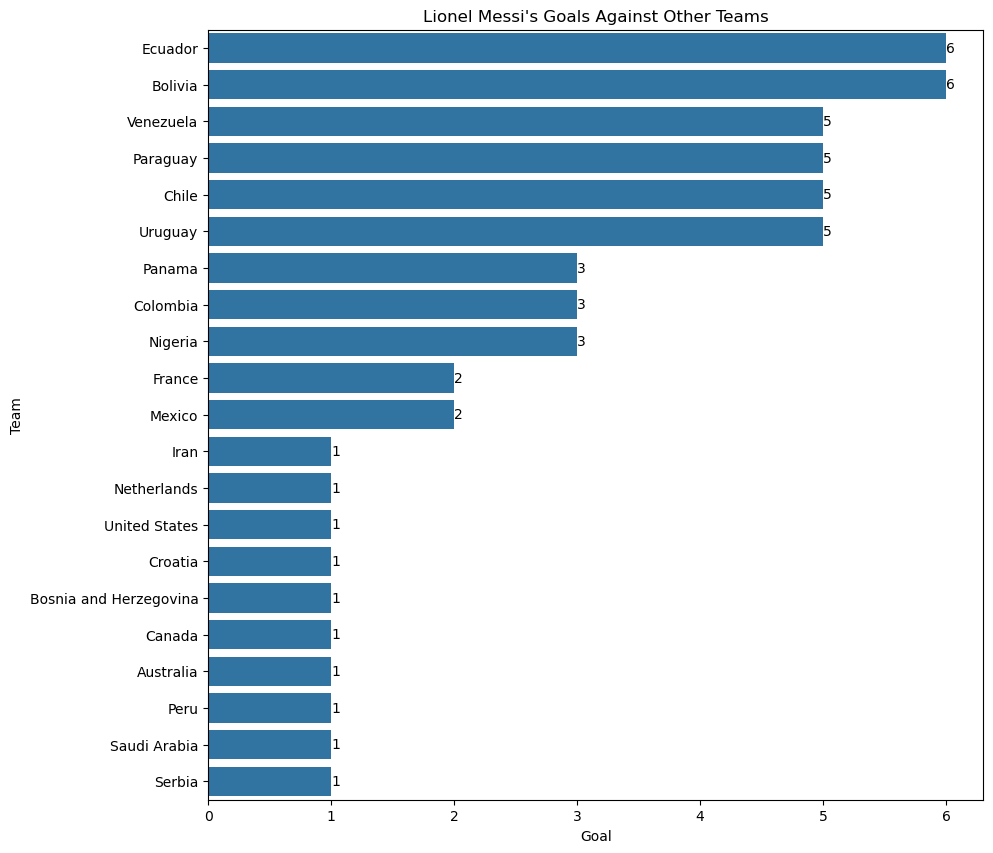

In [126]:
plt.figure(figsize=(10, 10))
g = sns.barplot(
    data=lm_goal, x="own_goal", y='team', orient="h"
)
g.bar_label(g.containers[0])

plt.title("Lionel Messi's Goals Against Other Teams")
plt.xlabel("Goal")
plt.ylabel("Team")
plt.show()

In [252]:
cr_df = player_df[player_df['scorer'] == 'Cristiano Ronaldo']

In [314]:
cr_goal_0015 = cr_df[(cr_df['minute'] > 0) & (cr_df['minute'] <= 15)]
cr_goal_1530 = cr_df[(cr_df['minute'] > 15) & (cr_df['minute'] <= 30)]
cr_goal_3045 = cr_df[(cr_df['minute'] > 30) & (cr_df['minute'] <= 45)]
cr_goal_4560 = cr_df[(cr_df['minute'] > 45) & (cr_df['minute'] <= 60)]
cr_goal_6075 = cr_df[(cr_df['minute'] > 60) & (cr_df['minute'] <= 75)]
cr_goal_7590 = cr_df[(cr_df['minute'] > 75) & (cr_df['minute'] <= 90)]

cr_goal = [len(cr_goal_0015), len(cr_goal_1530), len(cr_goal_3045), len(cr_goal_4560),
           len(cr_goal_6075), len(cr_goal_6075)]

cr_goal_df = pd.DataFrame(
    {'minute': ['0-15', '15-30', '30-45', '45-60', '60-75', '75-90'],
     'goal_count': cr_goal
    })
cr_goal_df

,minute,goal_count
0,0-15,15
1,15-30,13
2,30-45,14
3,45-60,13
4,60-75,25
5,75-90,25


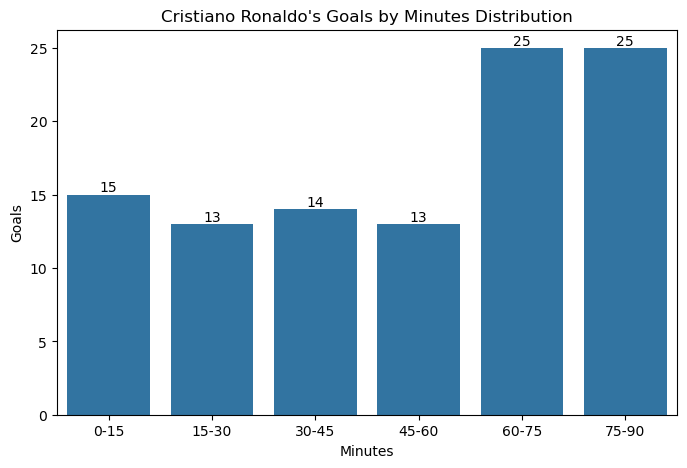

In [316]:
plt.figure(figsize=(8, 5))
g = sns.barplot(
    data=cr_goal_df, x="minute", y='goal_count'
)
g.bar_label(g.containers[0])

plt.title("Cristiano Ronaldo's Goals by Minutes Distribution")
plt.xlabel("Minutes")
plt.ylabel("Goals")
plt.show()

In [318]:
lm_df = player_df[player_df['scorer'] == 'Lionel Messi'].sort_values(by='minute')
lm_goal_0015 = lm_df[(lm_df.minute > 0) & (lm_df.minute <= 15)]
lm_goal_1530 = lm_df[(lm_df.minute > 15) & (lm_df.minute <= 30)]
lm_goal_3045 = lm_df[(lm_df.minute > 30) & (lm_df.minute <= 45)]
lm_goal_4560 = lm_df[(lm_df.minute > 45) & (lm_df.minute <= 60)]
lm_goal_6075 = lm_df[(lm_df.minute > 60) & (lm_df.minute <= 75)]
lm_goal_7590 = lm_df[(lm_df.minute > 75) & (lm_df.minute <= 90)]

lm_goal = [len(lm_goal_0015), len(lm_goal_1530), len(lm_goal_3045), len(lm_goal_4560),
           len(lm_goal_6075), len(lm_goal_6075)]

lm_goal_df = pd.DataFrame(
    {'minute': ['0-15', '15-30', '30-45', '45-60', '60-75', '75-90'],
     'goal_count': lm_goal
    })
lm_goal_df

,minute,goal_count
0,0-15,10
1,15-30,7
2,30-45,14
3,45-60,4
4,60-75,11
5,75-90,11


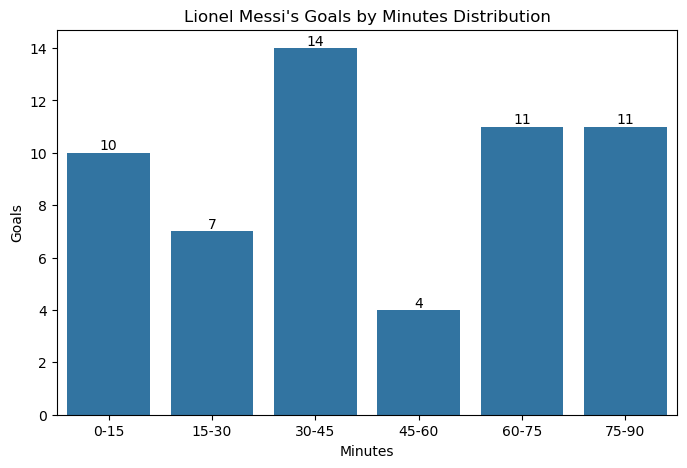

In [320]:
plt.figure(figsize=(8, 5))
g = sns.barplot(
    data=lm_goal_df, x="minute", y='goal_count'
)
g.bar_label(g.containers[0])

plt.title("Lionel Messi's Goals by Minutes Distribution")
plt.xlabel("Minutes")
plt.ylabel("Goals")
plt.show()